In [7]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate Different Initial Distributions of Interest

- Uniform
- Gaussian
- Stretched along 1 or 2 dimensions

In [8]:
def uniform_initial(n):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    z = np.random.uniform(-1, 1, n)
    return x, y, z

def normal_initial(n):
    x = np.random.normal(size=n)
    y = np.random.normal(size=n)
    z = np.random.normal(size=n)
    return x, y, z

def rectangular_initial(n):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    z = np.random.uniform(-5, 5, n)
    return x, y, z

In [17]:
def plot_3d(x,y,z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        x,y,z,
        s=5,              # marker size
        alpha=0.6,
        # cmap='viridis',
        linewidths=0,     # no edge lines, cleaner look
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Particle Distribution')

    max_range = np.ptp(np.column_stack((x,y,z)), axis=0).max() / 2  # ptp = peak to peak (max - min)
    mid = np.mean(np.column_stack((x,y,z)), axis=0)
    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    plt.tight_layout()
    plt.savefig('particles.pdf', dpi=300, bbox_inches='tight')  # vector for paper
    plt.show()

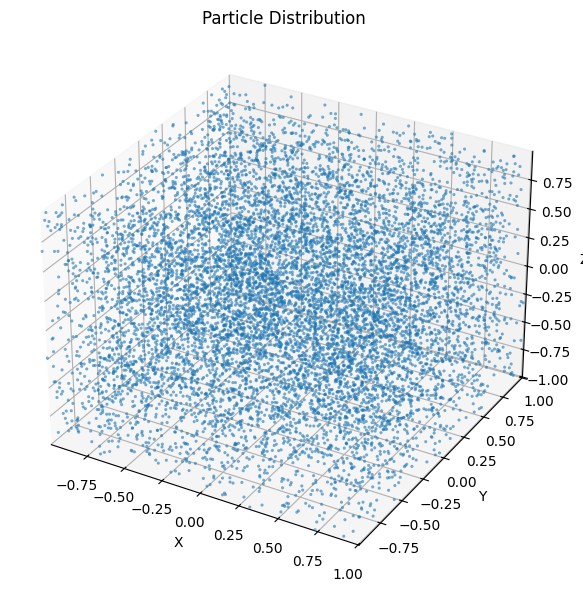

In [18]:
x,y,z = uniform_initial(10000)
plot_3d(x,y,z)

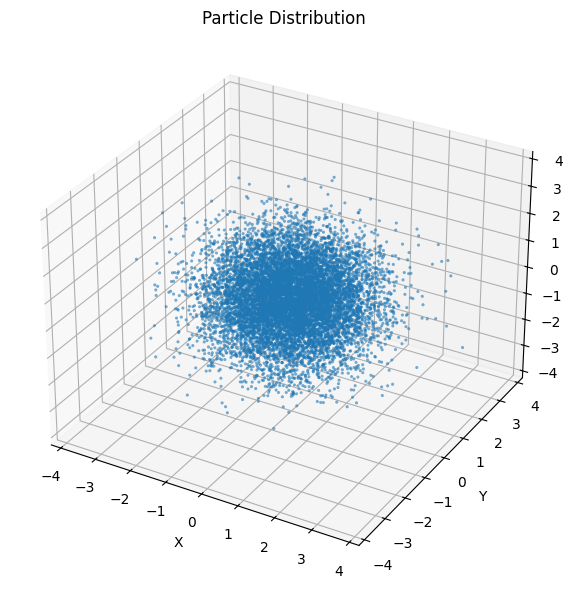

In [19]:
x,y,z = normal_initial(10000)
plot_3d(x,y,z)

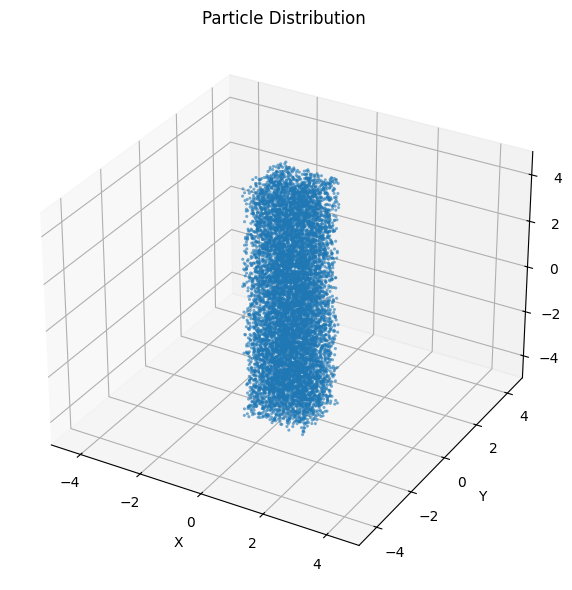

In [20]:
x,y,z = rectangular_initial(10000)
plot_3d(x,y,z)